Bisection Method Root: -0.26025390625
Iteration Method Root: 0.8885715155091707
Newton's Method Root: -0.2601679131886846


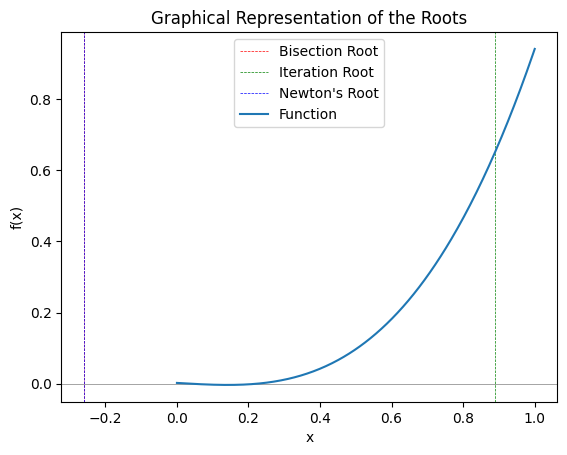

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from math import acos, sqrt

# Given function
def f(x):
    return x**3 - 0.06*x + 0.002

# Derivative of the function
def df(x):
    return 3*(x**2) - 0.06

# Bisection method
def bisection(a, b, tol):
    while (b - a) / 2.0 > tol:
        c = (a + b) / 2.0
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2.0

# Iteration method
def iteration(x0, tol):
    for _ in range(1000):  # Max 1000 iterations to prevent infinite loop
        x1 = sqrt(1 - 0.3*x0**3)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return None

# Initial interval for bisection method
a, b = -0.3, -0.1
tol = 1e-4

# Find roots
root_bisect = bisection(a, b, tol)
root_iter = iteration(a, tol)
root_newton = newton(f, a, fprime=df, tol=tol)

# Output the roots
print(f"Bisection Method Root: {root_bisect}")
print(f"Iteration Method Root: {root_iter}")
print(f"Newton's Method Root: {root_newton}")

# Plotting
x = np.linspace(0, 1, 400)
y = np.vectorize(f)(x)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(root_bisect, color='red', label='Bisection Root', lw=0.5, linestyle='--')
plt.axvline(root_iter, color='green', label='Iteration Root', lw=0.5, linestyle='--')
plt.axvline(root_newton, color='blue', label="Newton's Root", lw=0.5, linestyle='--')
plt.plot(x, y, label='Function')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical Representation of the Roots')
plt.show()
